In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt


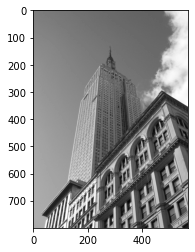

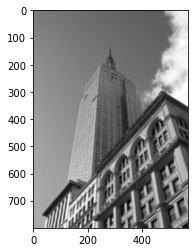

In [2]:
img = cv.imread('empire.jpg') #load image
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray, 'gray')
plt.show()
avg_kernel = np.ones((5,5), np.float32) / 25 #kernel K defined above
avg_result = cv.filter2D(img_gray, -1, avg_kernel) #always set the second parameter to -1
plt.imshow(avg_result, 'gray')
plt.show()

In [3]:
corner_kernel = np.ones((3,3), np.float32)
corner_kernel[0,1] = corner_kernel[1,0] = -2
corner_kernel[1,1] = 4
corner_kernel[1,2] = corner_kernel[2,1] = -2
corner_kernel = corner_kernel/4
print(corner_kernel)

[[ 0.25 -0.5   0.25]
 [-0.5   1.   -0.5 ]
 [ 0.25 -0.5   0.25]]


In [4]:
corner_result = cv.filter2D(img_gray, -1, corner_kernel)

True

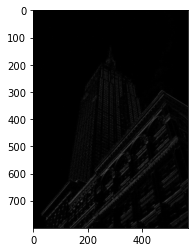

In [5]:
plt.imshow(corner_result, "gray")
cv.imwrite('empire_corner.jpg', corner_result)

[[0.00390625 0.015625   0.0234375  0.015625   0.00390625]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.0234375  0.09375    0.140625   0.09375    0.0234375 ]
 [0.015625   0.0625     0.09375    0.0625     0.015625  ]
 [0.00390625 0.015625   0.0234375  0.015625   0.00390625]]


True

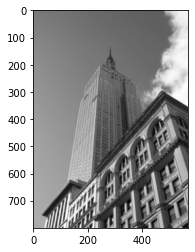

In [6]:
###Gaussian
Gaussian_kernel = np.ones((5,5), np.float32)
Gaussian_kernel[0,1], Gaussian_kernel[0,2], Gaussian_kernel[0,3] = 4, 6, 4
Gaussian_kernel[1,0], Gaussian_kernel[1,1], Gaussian_kernel[1,2], Gaussian_kernel[1,3], Gaussian_kernel[1,4] = 4, 16, 24, 16, 4
Gaussian_kernel[2,0], Gaussian_kernel[2,1], Gaussian_kernel[2,2], Gaussian_kernel[2,3], Gaussian_kernel[2,4] = 6, 24, 36, 24, 6
Gaussian_kernel[3,0], Gaussian_kernel[3,1], Gaussian_kernel[3,2], Gaussian_kernel[3,3], Gaussian_kernel[3,4] = 4, 16, 24, 16, 4
Gaussian_kernel[4,1], Gaussian_kernel[4,2], Gaussian_kernel[4,3] = 4, 6, 4


Gaussian_kernel = Gaussian_kernel/256
print(Gaussian_kernel)

Gaussian_result = cv.filter2D(img_gray, -1, Gaussian_kernel)
plt.imshow(Gaussian_result, "gray")
cv.imwrite('empire_gaussian.jpg', Gaussian_result)

[[-0.125  0.     0.125]
 [-0.25   0.     0.25 ]
 [-0.125  0.     0.125]]


True

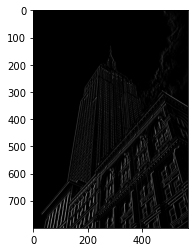

In [7]:
###Sobel
Sobel_kernel = np.ones((3,3), np.float32)
Sobel_kernel[0,0] = -1
Sobel_kernel[1,0] = -2
Sobel_kernel[2,0] = -1
Sobel_kernel[1,2] = 2
Sobel_kernel[0,1] = Sobel_kernel[1,1] = Sobel_kernel[2,1] = 0

Sobel_kernel = Sobel_kernel/8
print(Sobel_kernel)

Sobel_result = cv.filter2D(img_gray, -1, Sobel_kernel)
plt.imshow(Sobel_result, "gray")
cv.imwrite('empire_sobel.jpg', Sobel_result)

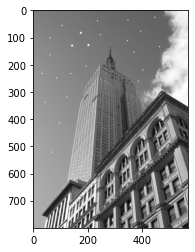

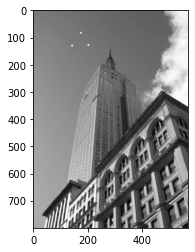

True

In [8]:
#Testing median filter
img_noise = cv.imread('empire_shotnoise.jpg')
img_noise_gray = cv.cvtColor(img_noise, cv.COLOR_BGR2GRAY)
ksize = 5 # neighbourhood of ksize x ksize; ksize must be an odd number
med_result = cv.medianBlur(img_noise_gray, ksize)

plt.imshow(img_noise_gray, 'gray')
plt.show()
plt.imshow(med_result, 'gray')
plt.show()
cv.imwrite('empire_median.jpg', med_result)

True

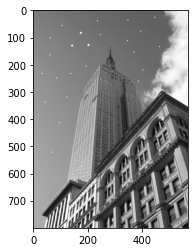

In [9]:
#Testing bilateral filter
rad = 5
sigma_s = 10 
sigma_c = 30 
bil_result = cv.bilateralFilter(img_noise_gray, rad, sigma_c, sigma_s)
plt.imshow(bil_result, 'gray')
cv.imwrite('empire_bilateral.jpg', bil_result)

True

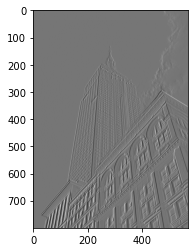

In [10]:
#Edge Detection
D_x = np.float32([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
der_x = cv.filter2D(img_gray, cv.CV_32F, D_x)
plt.imshow(der_x, 'gray')
cv.imwrite('empire_derivative_x.jpg', der_x)

True

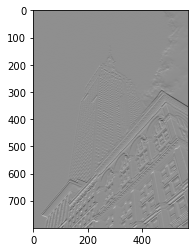

In [11]:
D_y = np.float32([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) / 8
der_y = cv.filter2D(img_gray, cv.CV_32F, D_y)
plt.imshow(der_y, 'gray')
cv.imwrite('empire_derivative_y.jpg', der_y)

True

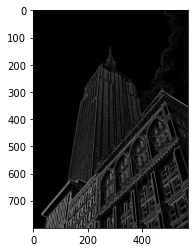

In [12]:
import math
height, width = img_gray.shape
mag_img_gray = np.zeros((height, width), np.float32)
for i in range(0, height):
    for j in range(0, width):
        square_der_x = float(der_x[i, j]) * float(der_x[i, j])
        square_der_y = float(der_y[i, j]) * float(der_y[i, j])
        mag_img_gray[i, j] = int(math.sqrt(square_der_x + square_der_y))
plt.imshow(mag_img_gray,'gray')
cv.imwrite('empire_grad_mag.jpg', mag_img_gray)

True

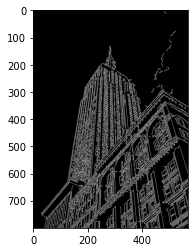

In [13]:
minVal = 100
maxVal = 200
Canny_edges = cv.Canny(img_gray, minVal, maxVal)
plt.imshow(Canny_edges, 'gray')
cv.imwrite('empire_canny.jpg', Canny_edges)